# Listing 2.1 Loading the MNIST dataset in Keras

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [3]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [4]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

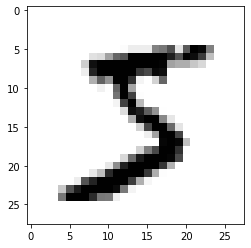

In [5]:
import matplotlib.pyplot as plt

digit = train_images[0]
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

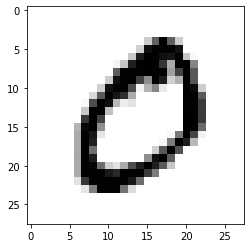

In [6]:
digit = train_images[1]
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

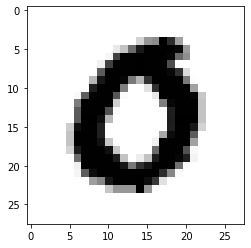

In [7]:
digit = train_images[8000]
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

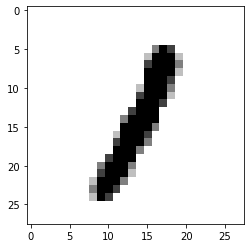

In [8]:
digit = train_images[19555]
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

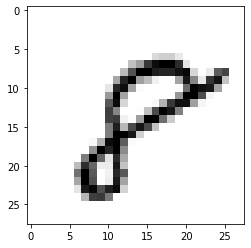

In [9]:
digit = train_images[59999]
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

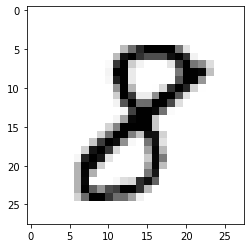

In [10]:
digit = train_images[60000-5]
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

Class Label: 5


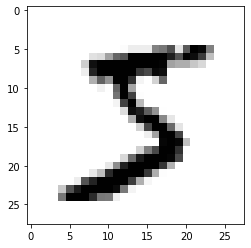

In [11]:
digit = train_images[0]
print("Class Label:", train_labels[0])
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

Class Label: 5


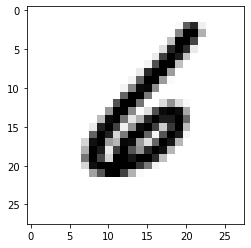

In [12]:
digit = train_images[999]
print("Class Label:", train_labels[0])
#digit.shape

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [13]:
import numpy as np

print(train_labels)
print(np.unique(train_labels))

[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
print(test_labels)
print(np.unique(test_labels))

[7 2 1 ... 4 5 6]
[0 1 2 3 4 5 6 7 8 9]


# Listing 2.2 The network architecture

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Listing 2.3 The compilation step

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
# ?network.compile
train_images.ndim

3

# Listing 2.4 Preparing the image data

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

# Listing 2.5 Preparing the labels

In [19]:
train_labels[0]

5

# One-Hot-Encode

In [20]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
# one hot encode
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Now Train The Model

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2583 - accuracy: 0.9244
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1040 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0683 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0499 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0384 - accuracy: 0.9881


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0693 - accuracy: 0.9794
test_acc: 0.9794


# MNIST Fashion Dataset

In [24]:
import tensorflow as tf

In [25]:
mnist = tf.keras.datasets.fashion_mnist

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [28]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(12, activation = tf.nn.softmax)])


In [29]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
            
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5134 - accuracy: 0.8224
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3769 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3324 - accuracy: 0.8787
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3079 - accuracy: 0.8875
Epoch 5/5
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3452 - accuracy: 0.8757


[0.34521502566337586, 0.8757]